# **[STINTSY] Machine Project - Spooky Author Identification**
## Group 4
- AVILES, Casie Rayne
- MENDOZA, Gretel
- ROLDAN, Immac Shandale
---

## 1 Introduction to the task and dataset
The dataset used in this project is provided in the website https://www.kaggle.com/c/spooky-author-identification. 

It is a Kaggle dataset specifically used in the competition "_Spooky Author Identification_" where the problem or task is multiclass classification which requires us to predict the author of a given set of excerpts from the horror stories by Edgar Allan Poe, Mary Shelley, and H.P. Lovecraft.

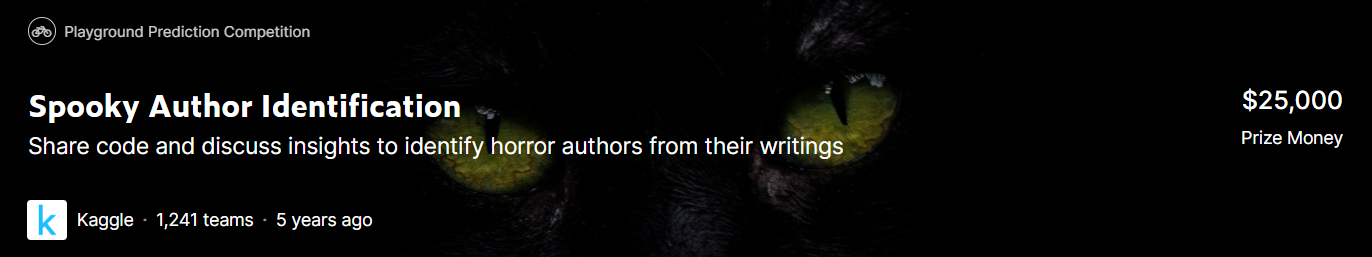

### Description of the Task

Multiclass Classification
- The task to be performed on the dataset is a multiclass classification because it requires the categorization of given excerpts from horror stories, in this case, we have 3 classes: Edgar Allan Poe (EAP), Mary Wollstonecraft Shelley (MWS), and H.P. Lovecraft (HPL). Basically, we want to identify who among the three authored a given excerpt.

Objective
- The goal is to experiment with various feature sets and learning algorithms in order to come up with the best classification model configuration that'll accurately predict who authored a given excerpt. Naturally, we'll have to compare these configurations amongst themselves and we'll specifically look at their training and validation accuracies. Once we've found the best performing model, it shall predict on the test set and these predictions are to be submitted in Kaggle. The evaluation metric to be used is multiclass log loss which should tell us if the model performs just as good on the test set.

## 2 Description of the dataset


Each instance in the dataset represents a sentence with its corresponding author and has the following features:
- `id` - a string value that serves as a unique identifier for the text
- `text` - a string value of the text/sentence written by one of the authors 
- `author` - a string value of the initials of the author of the sentence

The sentences in the `text` feature were generated using CoreNLP's MaxEnt sentence tokenizer. 

The values in the `author` feature represent the classes to be predicted and are limited to the following string values:  
- `EAP` : Edgar Allan Poe
- `HPL` : HP Lovecraft
- `MWS` : Mary Wollstonecraft Shelley

The dataset provided in the Kaggle competition is divided into train set and test set. The train dataset has 19,579 instances and has the three features mentioned. The test dataset contains 8,392 instances and has the id and text features only since the authors for each instance were not included.

## 3 List of requirements

### **Dataset/Files**
Ways to Download the dataset
1. Via "Kaggle API"
- kaggle competitions download -c spooky-author-identification
<br></br>
2. Via the website
- https://www.kaggle.com/competitions/spooky-author-identification/data
<br><br>
3. Via GitHub
- `train.csv` = https://raw.githubusercontent.com/casie-aviles/spooky-author-data/main/train.csv
- `test.csv` = https://raw.githubusercontent.com/casie-aviles/spooky-author-data/main/test.csv

### **Libraries**
- pandas
- contractions
- re
- string
- wordcloud
- matplotlib
- sklearn

## 4 Data preprocessing
- Remove unnecessary columns
- Remove null values
- Remove author misspellings
- Lowercase all text
- Remove digits
- Expand contractions
- Remove punctutations
- Remove stop words
- Remove leading and trailing spaces

To begin, let's first load the train and test data from the `.csv` file into an appropriate data structure. We will make use of `pandas.DataFrame`.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/casie-aviles/spooky-author-data/main/train.csv"
train = pd.read_csv(url)

print(train)

            id                                               text author
0      id26305  This process, however, afforded me no means of...    EAP
1      id17569  It never once occurred to me that the fumbling...    HPL
2      id11008  In his left hand was a gold snuff box, from wh...    EAP
3      id27763  How lovely is spring As we looked from Windsor...    MWS
4      id12958  Finding nothing else, not even gold, the Super...    HPL
...        ...                                                ...    ...
19574  id17718  I could have fancied, while I looked at it, th...    EAP
19575  id08973  The lids clenched themselves together as if in...    EAP
19576  id05267  Mais il faut agir that is to say, a Frenchman ...    EAP
19577  id17513  For an item of news like this, it strikes us i...    EAP
19578  id00393  He laid a gnarled claw on my shoulder, and it ...    HPL

[19579 rows x 3 columns]


In [2]:
url = "https://raw.githubusercontent.com/casie-aviles/spooky-author-data/main/test.csv"
test = pd.read_csv(url)

print(test)

           id                                               text
0     id02310  Still, as I urged our leaving Ireland with suc...
1     id24541  If a fire wanted fanning, it could readily be ...
2     id00134  And when they had broken down the frail door t...
3     id27757  While I was thinking how I should possibly man...
4     id04081  I am not sure to what limit his knowledge may ...
...       ...                                                ...
8387  id11749         All this is now the fitter for my purpose.
8388  id10526                 I fixed myself on a wide solitude.
8389  id13477  It is easily understood that what might improv...
8390  id13761  Be this as it may, I now began to feel the ins...
8391  id04282  Long winded, statistical, and drearily genealo...

[8392 rows x 2 columns]


### 4.1 Remove unnecessary columns
We can see that there are a total of three columns pertaining to the id, the text, and the author and that the total entries amount to 19,579. We don't really need the id column so we can drop that.

In [3]:
train = train.drop(columns=['id'])
print(train)

                                                    text author
0      This process, however, afforded me no means of...    EAP
1      It never once occurred to me that the fumbling...    HPL
2      In his left hand was a gold snuff box, from wh...    EAP
3      How lovely is spring As we looked from Windsor...    MWS
4      Finding nothing else, not even gold, the Super...    HPL
...                                                  ...    ...
19574  I could have fancied, while I looked at it, th...    EAP
19575  The lids clenched themselves together as if in...    EAP
19576  Mais il faut agir that is to say, a Frenchman ...    EAP
19577  For an item of news like this, it strikes us i...    EAP
19578  He laid a gnarled claw on my shoulder, and it ...    HPL

[19579 rows x 2 columns]


In [4]:
test = test.drop(columns=['id'])
print(test)

                                                   text
0     Still, as I urged our leaving Ireland with suc...
1     If a fire wanted fanning, it could readily be ...
2     And when they had broken down the frail door t...
3     While I was thinking how I should possibly man...
4     I am not sure to what limit his knowledge may ...
...                                                 ...
8387         All this is now the fitter for my purpose.
8388                 I fixed myself on a wide solitude.
8389  It is easily understood that what might improv...
8390  Be this as it may, I now began to feel the ins...
8391  Long winded, statistical, and drearily genealo...

[8392 rows x 1 columns]


### 4.2 Remove null or `NaN` values
There are many ways we could go about the data pre-processing and cleaning but we'll go ahead and start by checking for null occurrences in the data.

In [5]:
train.isnull().values.any()

False

In [6]:
test.isnull().values.any()

False

### 4.3 Remove class variations and misspellings
Results show that there are no missing values in the data set which is good. Next, we want to check if the unique author classes are exactly three (i.e. EAP, HPL, MWS) so we want to get rid of misspellings and other variations.

In [7]:
train['author'].unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

### 4.4 Lowercase all text
Great, there are exactly three classes. The next thing to do now is to deal with the text data which can get more complicated. Usually, we'll have to look at the cases, symbols, punctuation marks, etc. Let's start with lowercasing everything since words with different cases can be treated differently despite being the same word so we want to make sure this doesn't happen. Basically, we want the words to have one form only.

In [8]:
train['text'] = train['text'].apply(lambda x: x.lower())
print(train.head(5))

                                                text author
0  this process, however, afforded me no means of...    EAP
1  it never once occurred to me that the fumbling...    HPL
2  in his left hand was a gold snuff box, from wh...    EAP
3  how lovely is spring as we looked from windsor...    MWS
4  finding nothing else, not even gold, the super...    HPL


In [9]:
test['text'] = test['text'].apply(lambda x: x.lower())
print(test.head(5))

                                                text
0  still, as i urged our leaving ireland with suc...
1  if a fire wanted fanning, it could readily be ...
2  and when they had broken down the frail door t...
3  while i was thinking how i should possibly man...
4  i am not sure to what limit his knowledge may ...


### 4.5 Expand contractions
Now that we've converted everything to lowercase, we'll want to expand contracted words next to keep things uniform. This can also help our analysis down the line. To do that, let's install the `contractions` library.

In [10]:
# !pip install contractions

In [11]:
! conda install contractions

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - contractions

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Once done, let's import `contractions` and begin using `contractions.fix()` on the texts which should perform the expansion for us.

In [12]:
import contractions

print("before:", train['text'].iloc[3295])
print("before:", train['text'].iloc[8])

for i in range(len(train)):
  train['text'].iloc[i] = contractions.fix(train['text'].iloc[i])

print("---")
print("after:", train['text'].iloc[3295])
print("after:", train['text'].iloc[8])

before: but it's all cum ob do bug."
before: i knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of epicurus; and since, when we discussed this subject not very long ago, i mentioned to you how singularly, yet with how little notice, the vague guesses of that noble greek had met with confirmation in the late nebular cosmogony, i felt that you could not avoid casting your eyes upward to the great nebula in orion, and i certainly expected that you would do so.
---
after: but it is all cum ob do bug."
after: i knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of epicurus; and since, when we discussed this subject not very long ago, i mentioned to you how singularly, yet with how little notice, the vague guesses of that noble greek had met with confirmation in the late nebular cosmogony, i felt that you could not avoid casting your eyes upward to the

In [13]:
print("before:", test['text'].iloc[3143])

for i in range(len(test)):
  test['text'].iloc[i] = contractions.fix(test['text'].iloc[i])

print("---")
print("after:", test['text'].iloc[3143])

before: spose i drop him down fuss, and den de limb won't break wid just de weight ob one nigger."
---
after: spose i drop him down fuss, and den de limb will not break wid just de weight ob one nigger."


### 4.6 Remove digits
From the output above, we can see that "_it's_" has been expanded to "_it is_" but the word " _'stereotomy'_ " was unchanged. This means only contractions are affected and words that have apostrophes but aren't contractions remain unaffected. Now let's check for the presence of any digits in the text.

In [14]:
has_digit = False

for string in train['text']:
  if (any(char.isdigit() for char in string)) == True:
    has_digit = True

print(has_digit)

False


In [15]:
has_digit = False

for string in test['text']:
  if (any(char.isdigit() for char in string)) == True:
    has_digit = True

print(has_digit)

False


### 4.7 Remove punctuation marks 
We did not find any so there's no need to remove digits. Judging from the first 5 rows, we can already see that there are punctuation marks in the text. With that, let's move on to removing these symbols since they're insignificant to the data analysis. We'll import two libraries: the `re` library which lets us use regular expressions, and the `string` module for `string.punctuation` which is a string of all punctuation symbols.

In [16]:
import re
import string

train['text'] = train['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
print(train.head(5))

                                                text author
0  this process however afforded me no means of a...    EAP
1  it never once occurred to me that the fumbling...    HPL
2  in his left hand was a gold snuff box from whi...    EAP
3  how lovely is spring as we looked from windsor...    MWS
4  finding nothing else not even gold the superin...    HPL


In [17]:
test['text'] = test['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
print(test.head(5))

                                                text
0  still as i urged our leaving ireland with such...
1  if a fire wanted fanning it could readily be f...
2  and when they had broken down the frail door t...
3  while i was thinking how i should possibly man...
4  i am not sure to what limit his knowledge may ...


### 4.8 Remove stop words
Now that punctuations have been dealt with, the last thing we'll do is to remove stop words. Stop words or function words (e.g. a, an, the, is, or, etc.) can be kind of a nuisance since they don't really have meaning and only serve to construct sentences. They also tend to appear frequently in sentences and the problem with that is if we want to look at term frequency and a stop word comes up as most frequent, we're not really gaining anything insightful from that.

In [18]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(train.head(5))

                                                text author
0  process afforded means ascertaining dimensions...    EAP
1                     occurred fumbling mere mistake    HPL
2  left hand gold snuff box capered hill cutting ...    EAP
3  lovely spring looked windsor terrace sixteen f...    MWS
4  finding gold superintendent abandoned attempts...    HPL


In [19]:
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(test.head(5))

                                                text
0  urged leaving ireland inquietude impatience fa...
1  wanted fanning readily fanned newspaper govern...
2  broken frail door cleanly picked human skeleto...
3  thinking possibly manage actually tumbled head...
4                        sure limit knowledge extend


### 4.9 Remove leading and trailing spaces
Alright, we're almost done with the pre-processing and cleaning. All that's left is to do a little polishing by removing leading and trailing spaces using Python's built-in `strip()` method.

In [20]:
train["text"] = train["text"].map(lambda x: x.strip())
print(train.head(5))

                                                text author
0  process afforded means ascertaining dimensions...    EAP
1                     occurred fumbling mere mistake    HPL
2  left hand gold snuff box capered hill cutting ...    EAP
3  lovely spring looked windsor terrace sixteen f...    MWS
4  finding gold superintendent abandoned attempts...    HPL


In [21]:
test["text"] = test["text"].map(lambda x: x.strip())
print(test.head(5))

                                                text
0  urged leaving ireland inquietude impatience fa...
1  wanted fanning readily fanned newspaper govern...
2  broken frail door cleanly picked human skeleto...
3  thinking possibly manage actually tumbled head...
4                        sure limit knowledge extend


Before we end the pre-processing stage, let's split the training set into `X_train` (i.e. the corpus)  and `y_train` (i.e. the classes) so that we have a corpus to feed into the vectorizers. Since the data from the Kaggle competition has already separated the train and test sets, we don't need to perform `train_test_split()`. Let's simply rename `test` as `X_test`.

In [22]:
X_train = train.iloc[:,0]
y_train = train.iloc[:,1]

print(X_train.head(5),"\n")
print(y_train.head(5))

0    process afforded means ascertaining dimensions...
1                       occurred fumbling mere mistake
2    left hand gold snuff box capered hill cutting ...
3    lovely spring looked windsor terrace sixteen f...
4    finding gold superintendent abandoned attempts...
Name: text, dtype: object 

0    EAP
1    HPL
2    EAP
3    MWS
4    HPL
Name: author, dtype: object


In [23]:
X_test = test.iloc[:,0]
print(X_test.head(5))

0    urged leaving ireland inquietude impatience fa...
1    wanted fanning readily fanned newspaper govern...
2    broken frail door cleanly picked human skeleto...
3    thinking possibly manage actually tumbled head...
4                          sure limit knowledge extend
Name: text, dtype: object


## 5 Exploratory data analysis
- Get the total number of documents
- Spot possible anomalies or quirks
- How many documents per author + what percentage do each author's works make up the corpus
- Generate word cloud of most frequent words used by authors in their document

For the EDA, we can start simple using `pandas`' native functions such as `info()` and `describe()`. We'll primarily look at the train set throughout this section since the test set lacks the author column which we'll need to fill in ourselves with our model's predictions later on.

Here we can again see how many entries there are which is still 19,579. The output also shows that there aren't any null entries which is expected, given that we've already checked for null earlier. 

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    19579 non-null  object
 1   author  19579 non-null  object
dtypes: object(2)
memory usage: 306.0+ KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8392 non-null   object
dtypes: object(1)
memory usage: 65.7+ KB


Below, we can see that there are actually repeated texts since the values for text count and unique are not equal. The top row shows which text or author were most frequent. Oddly enough, the top text returns blank but has a corresponding frequency of 26. For the top author, it seems Poe takes the title with a frequency of 7,900 meaning Poe has a total of 7,900 authored texts in the dataset. Later on, we'll get to see the figures for the other authors.

In [26]:
train.describe()

,text,author
count,19579,19579
unique,19511,3
top,,EAP
freq,26,7900


On the flipside, the test set doesn't have any repeated texts.

In [27]:
test.describe()

,text
count,8392
unique,8382
top,
freq,9


Let's try to visualize things from here in order to get a better look at our data. Aside from the text/document counts for each author and what percentage they take up, let's also visualize the words they most frequently use in the entire corpus. This can give us an initial idea on their writing styles and what words we can expect from their work. To do that, we'll be using `WordCloud` as well as `matplotlib.pyplot` for its handy data visualization tools.

In [28]:
# !pip install wordcloud

In [29]:
! conda install wordcloud

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - wordcloud

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

We can also define a function for displaying our word clouds. Inside we can see some parameters that we can tweak in order to customize their appearance.

In [31]:
def visualize(text):
  wordcloud = WordCloud(background_color="white").generate(text)
  plt.figure(figsize=(9,4))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


Edgar Allan Poe Word Cloud
Document count: 7900 (0.4035)


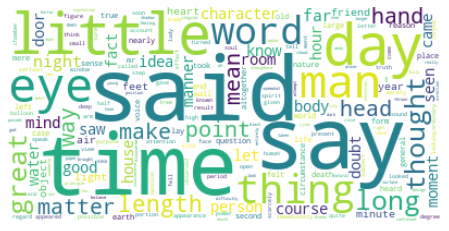


H.P. Lovecraft Word Cloud
Document count: 5635 (0.2878)


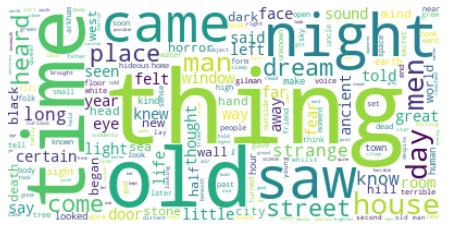


Mary Wollstonecraft Shelley Word Cloud
Document count: 6044 (0.3087)


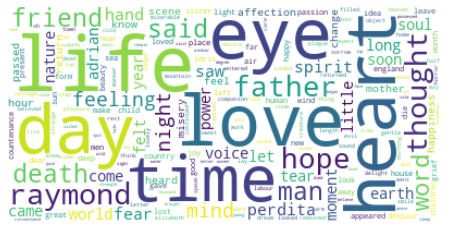

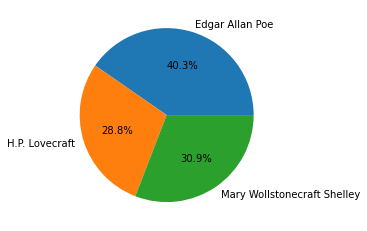

In [32]:
eap_docs = [i for i in range(len(y_train)) if y_train[i] == "EAP"]
hpl_docs = [i for i in range(len(y_train)) if y_train[i] == "HPL"]
mws_docs = [i for i in range(len(y_train)) if y_train[i] == "MWS"]

authors_docs = [eap_docs, hpl_docs, mws_docs]
authors = ["Edgar Allan Poe", "H.P. Lovecraft", "Mary Wollstonecraft Shelley"]
doc_count = []

for i in range(len(authors_docs)):
  text = []

  for index in authors_docs[i]:
    text.append(X_train[index])
  text = " ".join(i for i in text)
  
  print("\n" + authors[i], "Word Cloud")

  doc_count.append(len(authors_docs[i]))
  print("Document count: %d (%.4f)" % (len(authors_docs[i]), (len(authors_docs[i])/len(train))))

  visualize(text)

print()
plt.pie(doc_count, labels=authors, autopct='%1.1f%%')
plt.show() 

The word clouds above indeed show interesting results. The big words in each cloud represent the most frequently used words by each author. Also worth noting that we have removed stop words and so our word clouds may have resulted differently if they were retained and it might have been more difficult to get a sense of what the authors typically write about. Conversely, it could be the case that the frequent use of stop words correspond to how they write, which is not necessarily of value to what they write about. Though to scope things down, let's focus on what their works are about. Lastly, we also have a pie chart confirming that Poe's works dominate the dataset.

## 6 Feature engineering
- Term Occurrence (TO)
- Bag of Words (BoW)
- TF•IDF

Before we dive into extracting our features, let's define some important terms that we'll be using throughout this stage.

- A **corpus** is a collection of documents.
- A **document** refers to each of the entries under the text column. In our case, these are the excerpts from various literature authored by Poe, Lovecraft, and Shelley.
- A **document-term matrix** is a matrix wherein each cell is some value pertaining to the relationship of some term to some document.
- A **feature** is the above-mentioned value contained in each cell of the matrix. It could be a count of how many times a word occurred in some document, a TF•IDF value, or a binary value that pertains to whether a word has occurred in some document or not at all.
- A **term** is just a word, token, or feature name.
- A **vocabulary** is a collection of all the unique terms/words/tokens that occur at least once in the entire corpus.
- **Compressed sparse row (CSR)** is a sparse matrix representation that makes it easier to view nonzero values by ignoring zero values.
- A **dense matrix**, when printed, outputs all values regardless if they're zero or not. We used `scipy.sparse.csr_matrix.toarray()` to convert a sparse matrix into a dense matrix.

Now that we've pre-processed our data, we can begin extracting features from it. There are a few techniques that we can utilize and so we can experiment in terms of which technique we use in conjunction with other learning algorithms as part of our models' configurations.

### 6.1 Term Occurrence (TO)
The first technique we'll use is called **Term Occurrence (TO)**, which looks at the absence or presence of some word in some document. If a word occurs in some document at least once, then it assigns a value of 1. Otherwise, it assigns a value of 0. These binary values are contained within a document-term matrix. Knowing which word occurs in which excerpt or document can help us identify who the author is. For example, if we know that the word "_Cthulhu_" is present in excerpts from H.P. Lovecraft, then we can assume that documents containing "_Cthulhu_" are from Lovecraft although this is admittedly a naive approach. Later techniques improve upon this.

As we instantiate a `CountVectorizer` object, we're met with a bunch of parameters that we can tweak which can affect the results we'll obtain. For now, let's leave everything at their default values except for one. We will set `binary="True"` because we only want our vectorizer to output either 1 or 0 to denote if a word occurs in a document or not. `CountVectorizer`, as well as the other vectorizers from `sklearn.feature_extraction.text` can conveniently handle the pre-processing for us but for the sake of explaining the pre-processing stage, we dedicated a separate section for that.


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

occurrence_vectorizer = CountVectorizer(binary="True")
X_train_occurrence_sparse_matrix = occurrence_vectorizer.fit_transform(X_train)
X_test_occurrence_sparse_matrix = occurrence_vectorizer.transform(X_test)

Now that we have our CSR sparse matrix, let's take a look at the feature names (i.e. the vocabulary) that we have learned using `fit_transform()`. Since there are a total of 25,019 feature names (i.e. 25,019 words in the vocabulary), let's print only the first 20 just so we can get an idea of what they are.

In [34]:
occurrence_feature_names = occurrence_vectorizer.get_feature_names()
print("total feature names:", len(occurrence_feature_names))
occurrence_feature_names[:20]

total feature names: 25019


['aaem',
 'ab',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abaout',
 'abased',
 'abasement',
 'abashed',
 'abashment',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbey',
 'abbeys',
 'abbreviation']

Noticeably, the feature names are just **unigrams** which means we treat the words independently from each other. This is because the default value of the `ngram_range` is set to (1,1).

Below is how our occurrence sparse matrix looks like. As defined earlier, zero values are ignored and so we only see 1's all throughout. Based on this format:
>`(<document>, <term>)         <count>`

We can see which term appears in which document although we don't know how many times.

*Note: `<document>` doesn't pertain to the index of a document in the matrix. It simply denotes the order of documents being displayed.*

In [35]:
print(X_train_occurrence_sparse_matrix[:,:])

  (0, 17138)	1
  (0, 453)	1
  (0, 13714)	1
  (0, 1279)	1
  (0, 6143)	1
  (0, 6910)	1
  (0, 13403)	1
  (0, 3725)	1
  (0, 18590)	1
  (0, 16634)	1
  (0, 19707)	1
  (0, 1631)	1
  (0, 8231)	1
  (0, 16070)	1
  (0, 23278)	1
  (0, 24217)	1
  (1, 15117)	1
  (1, 9260)	1
  (1, 13856)	1
  (1, 14094)	1
  (2, 12757)	1
  (2, 10143)	1
  (2, 9733)	1
  (2, 20373)	1
  (2, 2568)	1
  :	:
  (19574, 7333)	1
  (19575, 20594)	1
  (19575, 12877)	1
  (19575, 3846)	1
  (19576, 19265)	1
  (19576, 10985)	1
  (19576, 13394)	1
  (19576, 9142)	1
  (19576, 15446)	1
  (19576, 8263)	1
  (19576, 8420)	1
  (19576, 501)	1
  (19577, 12916)	1
  (19577, 17932)	1
  (19577, 14752)	1
  (19577, 12081)	1
  (19577, 4745)	1
  (19577, 21152)	1
  (19578, 12528)	1
  (19578, 14043)	1
  (19578, 9695)	1
  (19578, 715)	1
  (19578, 19913)	1
  (19578, 19762)	1
  (19578, 3821)	1


In [36]:
print(X_test_occurrence_sparse_matrix)

  (0, 2144)	1
  (0, 8395)	1
  (0, 11092)	1
  (0, 11633)	1
  (0, 11993)	1
  (0, 12732)	1
  (0, 22170)	1
  (0, 23646)	1
  (0, 24930)	1
  (1, 225)	1
  (1, 1360)	1
  (1, 2062)	1
  (1, 6676)	1
  (1, 6927)	1
  (1, 8332)	1
  (1, 9779)	1
  (1, 9910)	1
  (1, 10136)	1
  (1, 11999)	1
  (1, 12727)	1
  (1, 14666)	1
  (1, 14753)	1
  (1, 15629)	1
  (1, 17276)	1
  (1, 17859)	1
  :	:
  (8390, 8474)	1
  (8390, 10692)	1
  (8390, 11702)	1
  (8390, 12791)	1
  (8390, 13119)	1
  (8390, 14984)	1
  (8390, 18471)	1
  (8390, 19519)	1
  (8390, 20974)	1
  (8390, 21277)	1
  (8390, 22177)	1
  (8391, 2740)	1
  (8391, 4636)	1
  (8391, 6570)	1
  (8391, 9471)	1
  (8391, 9742)	1
  (8391, 10724)	1
  (8391, 11183)	1
  (8391, 13116)	1
  (8391, 13422)	1
  (8391, 13669)	1
  (8391, 17033)	1
  (8391, 17752)	1
  (8391, 21953)	1
  (8391, 22188)	1


With that, we can also try displaying the document-term matrix as a `pandas.DataFrame` so we'll have to convert the sparse array into a dense `numpy.ndarray` using `toarray()`. Below, we can see that there are A LOT of zeroes. We've decided to handpick a row that at least shows a value of 1 since it's difficult to find given the size of the corpus and the number of features.

In [37]:
X_train_occurrence_dense_matrix = X_train_occurrence_sparse_matrix[10349:10351,:].toarray()
X_train_occurrence_df = pd.DataFrame(X_train_occurrence_dense_matrix, columns=occurrence_feature_names, index=X_train[10349:10351])
X_train_occurrence_df

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abased,...,æneid,ærial,æronaut,æronauts,ærostation,æschylus,élite,émeutes,οἶδα,υπνος
text,,,,,,,,,,,,,,,,,,,,,
taken aback breeze helseggen,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
watery blue eyes savage maniacal dirty white beard bristled electrically,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




---


### 6.2 Bag of Words (BoW)
The next technique is **Bag of Words** wherein we convert our raw data into a `scipy.sparse.csr_matrix` of raw word counts (i.e. a matrix containing how many times each word appears in a given document). Do note that this approach does not take into account word order. We'll continue to use `CountVectorizer` although this time, we'll keep `binary="False"` as is since we now want the actual counts. With word counts, we can identify which author uses a particular word more times than other authors who also use that same word.

In [38]:
count_vectorizer = CountVectorizer()
X_train_count_sparse_matrix = count_vectorizer.fit_transform(X_train)
X_test_count_sparse_matrix = count_vectorizer.transform(X_test)

Like before, we still have the same feature names or words in our vocabulary.

In [39]:
count_feature_names = count_vectorizer.get_feature_names()
print("total feature names:", len(count_feature_names))
count_feature_names[:20]

total feature names: 25019


['aaem',
 'ab',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abaout',
 'abased',
 'abasement',
 'abashed',
 'abashment',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbey',
 'abbeys',
 'abbreviation']

We handpicked a certain row from the count sparse matrix so we could see the difference from the previous one. Unlike before, we only saw the integer 1 but now we also have 2 which means the values we've generated are the raw counts themselves, instead of simply being an indication of occurrence.

In [40]:
print(X_train_count_sparse_matrix[10,:])

  (0, 19766)	2
  (0, 8474)	1
  (0, 11596)	1
  (0, 12720)	1
  (0, 6749)	1
  (0, 18610)	1
  (0, 5415)	1
  (0, 1221)	1


In [41]:
print(X_test_count_sparse_matrix)

  (0, 2144)	1
  (0, 8395)	1
  (0, 11092)	1
  (0, 11633)	1
  (0, 11993)	1
  (0, 12732)	1
  (0, 22170)	1
  (0, 23646)	1
  (0, 24930)	1
  (1, 225)	1
  (1, 1360)	1
  (1, 2062)	1
  (1, 6676)	1
  (1, 6927)	1
  (1, 8332)	1
  (1, 9779)	1
  (1, 9910)	1
  (1, 10136)	1
  (1, 11999)	1
  (1, 12727)	1
  (1, 14666)	1
  (1, 14753)	1
  (1, 15629)	1
  (1, 17276)	1
  (1, 17859)	1
  :	:
  (8390, 8474)	1
  (8390, 10692)	1
  (8390, 11702)	1
  (8390, 12791)	1
  (8390, 13119)	1
  (8390, 14984)	1
  (8390, 18471)	1
  (8390, 19519)	1
  (8390, 20974)	1
  (8390, 21277)	1
  (8390, 22177)	1
  (8391, 2740)	1
  (8391, 4636)	1
  (8391, 6570)	1
  (8391, 9471)	1
  (8391, 9742)	1
  (8391, 10724)	1
  (8391, 11183)	2
  (8391, 13116)	1
  (8391, 13422)	1
  (8391, 13669)	1
  (8391, 17033)	1
  (8391, 17752)	1
  (8391, 21953)	1
  (8391, 22188)	1


In [42]:
X_train_count_dense_matrix = X_train_count_sparse_matrix[10349:10351,:].toarray()
X_train_count_df = pd.DataFrame(X_train_count_dense_matrix, columns=count_feature_names, index=X_train[10349:10351])
X_train_count_df

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abased,...,æneid,ærial,æronaut,æronauts,ærostation,æschylus,élite,émeutes,οἶδα,υπνος
text,,,,,,,,,,,,,,,,,,,,,
taken aback breeze helseggen,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
watery blue eyes savage maniacal dirty white beard bristled electrically,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




---


### 6.3 Term Frequency • Inverse Document Frequency (TF•IDF)
Lastly, we'll use **Term Frequency • Inverse Document Frequency (TF•IDF)** which is basically a weighting scheme wherein we give more value to rarer words and less value to more frequent words in relation to the entire corpus. We'll import `TfidfVectorizer` from `sklearn.feature_extraction.text`. This will let us convert our raw data into a CSR sparse matrix of TF•IDF features (i.e. a document-term matrix). Unlike `TfidfTransformer`, we don't need to generate a count matrix separately so we can simply plug in our corpus. It's worth noting that unlike the previous two techniques that produce integers (i.e. discrete values), TF•IDF produces floats (i.e. continuous values). As usual, we'll leave the parameters to their default values.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf_sparse_matrix = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_sparse_matrix = tfidf_vectorizer.transform(X_test)

In [44]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print("total feature names:", len(tfidf_feature_names))
tfidf_feature_names[:20]

total feature names: 25019


['aaem',
 'ab',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abaout',
 'abased',
 'abasement',
 'abashed',
 'abashment',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbey',
 'abbeys',
 'abbreviation']

Again, unlike the previous two sparse matrices, our features are continuous floating point values rather than discrete integers. This is a result of the computations that TF•IDF performs. Notice that TF•IDF is essentially a product of two values: Term Frequency (TF) and Inverse Document Frequency (IDF). TF is computed through the formula:


$$TF(t,d) = \frac{N_{t,d}}{N_d}$$

\begin{aligned}
Where:
\\&TF = term\ frequency
\\&t = term/token/word
\\&d=document
\\&N_{t,d} = total\ occurrences\ of\ t\ in\ d
\\&N_d = total\ no.\ of\ terms\ in\ d
\end{aligned}
<br></br>
Meanwhile, IDF is computed through the formula:

$$IDF(t,D) = log({\frac{N_D}{N_{t,D}}})$$


\begin{aligned}
Where:
\\&IDF = inverse\ document\ frequency
\\&t = term/token/word
\\&D=documents
\\&N_{t,D} = total\ occurrences\ of\ t\ in\ D
\\&N_D = total\ no.\ of\ documents
\end{aligned}

In [45]:
print(X_train_tfidf_sparse_matrix[:,:])

  (0, 24217)	0.21696364362967083
  (0, 23278)	0.3020034613752269
  (0, 16070)	0.2559503341763652
  (0, 8231)	0.2052999200715928
  (0, 1631)	0.2407393021862237
  (0, 19707)	0.20621425345940886
  (0, 16634)	0.19726524833055104
  (0, 18590)	0.20353956045559748
  (0, 3725)	0.29558576878201387
  (0, 13403)	0.18471034157047353
  (0, 6910)	0.29864855674549473
  (0, 6143)	0.2742498756190863
  (0, 1279)	0.31998444990842223
  (0, 13714)	0.20311289030711907
  (0, 453)	0.2540972823244096
  (0, 17138)	0.2813134552560119
  (1, 14094)	0.5230718227301623
  (1, 13856)	0.41209186654388175
  (1, 9260)	0.5943778533208967
  (1, 15117)	0.45087817564810995
  (2, 19222)	0.23794279127329385
  (2, 19590)	0.1896880245965057
  (2, 16789)	0.17838323191031275
  (2, 9882)	0.2019212221490141
  (2, 551)	0.16373508363571446
  :	:
  (19574, 13131)	0.26987897653605
  (19575, 3846)	0.5971840599916342
  (19575, 12877)	0.5237677915663489
  (19575, 20594)	0.6074853899556912
  (19576, 501)	0.4019518697543232
  (19576, 8420)	0

In [46]:
print(X_test_tfidf_sparse_matrix)

  (0, 24930)	0.3519235743418148
  (0, 23646)	0.32596283035525947
  (0, 22170)	0.22117094328147122
  (0, 12732)	0.31327652573780057
  (0, 11993)	0.40424948827104257
  (0, 11633)	0.436080687529658
  (0, 11092)	0.35779402961387496
  (0, 8395)	0.2512256158401409
  (0, 2144)	0.27950737169809187
  (1, 24350)	0.235498375818241
  (1, 24248)	0.21005681276366897
  (1, 22309)	0.1168668987729211
  (1, 21038)	0.15695790487300046
  (1, 19905)	0.1673761865075041
  (1, 18906)	0.2182532816097453
  (1, 18423)	0.2028521633039112
  (1, 17859)	0.20026778899454878
  (1, 17276)	0.19246717253537404
  (1, 15629)	0.2028521633039112
  (1, 14753)	0.22552736876922597
  (1, 14666)	0.18188680485519346
  (1, 12727)	0.24231286880686725
  (1, 11999)	0.18900091864845883
  (1, 10136)	0.2464927272179437
  (1, 9910)	0.16013085375890862
  :	:
  (8390, 18471)	0.2742785135374045
  (8390, 14984)	0.3264362263015814
  (8390, 13119)	0.2069375416836803
  (8390, 12791)	0.1851088453870424
  (8390, 11702)	0.3145912151761012
  (8390, 

In [47]:
X_train_tfidf_dense_matrix = X_train_tfidf_sparse_matrix[10349:10351,:].toarray()
X_train_tfidf_df = pd.DataFrame(X_train_tfidf_dense_matrix, columns=tfidf_feature_names, index=X_train[10349:10351])
X_train_tfidf_df

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abased,...,æneid,ærial,æronaut,æronauts,ærostation,æschylus,élite,émeutes,οἶδα,υπνος
text,,,,,,,,,,,,,,,,,,,,,
taken aback breeze helseggen,0.0,0.0,0.597411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
watery blue eyes savage maniacal dirty white beard bristled electrically,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To recap, we've made use of three feature extraction methods namely, Term Occurrence, Bag of Words, and TF•IDF. We've produced sparse matrices from each of these methods which contain values that should help us in training our model. Through further experiments, we may later on see which features work best with a certain learning algorithm.

## 7 Model training
- Multinomial Naive Bayes
- Logistic Regression

###  Why Multinomial Naive Bayes?
Nice. It's time to finally work on our models. First on the list is **Multinomial Naive Bayes**. The rationale behind this learning algorithm is that Naive Bayes as a whole is good at dealing with text data. We chose multinomial specifically because we have multiple classes, 3 to be exact, and that we have discrete features for both Term Occurrence and Bag of Words. With that, why use TF•IDF values then if they don't satisfy this criteria? Apparently, according to [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)'s documentation:
> The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

### Why Multinomial Logistic Regression?
Since we have a classification task, **Multinomial Logistic Regression** is also a good candidate for our model since it deals with predicting classes. Also, we opted to use `SGDClassifier` over `LogisticRegression` due to the benefits offered by the **Stochastic Gradient Descent (SGD)** approach, specifically its efficiency and ease of implementation. 

Let's import `SGDClassifier` from `sklearn.linear_model` and initialize our model. As usual, we'll keep the default parameters for the meantime.

Since our test data doesn't come with its ground truth, we can't evaluate for the test prediction accuracy so we'll settle with training accuracy for now. To do that, we'll be using `sklearn.metric`'s `accuracy_score` which simply counts the number of correct predictions and divides that by the total.

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

features = [X_train_occurrence_sparse_matrix, 
            X_train_count_sparse_matrix, 
            X_train_tfidf_sparse_matrix]

techniques = ["Term Occurrence", "Bag of Words", "TFIDF"]

classifiers = [MultinomialNB(), SGDClassifier(loss='log')]

results = {}

for clf in classifiers:
  for i in range(len(features)):
    clf.fit(features[i], y_train)
    y_pred = clf.predict(features[i])
    results[(str(clf), techniques[i])] = {
          'Training Accuracy': accuracy_score(y_train, y_pred)
        }

pd.DataFrame(results).T

Training Accuracy
MultinomialNB()           Term Occurrence           0.908882
                          Bag of Words              0.908729
                          TFIDF                     0.908167
SGDClassifier(loss='log') Term Occurrence           0.940804
                          Bag of Words              0.942592
                          TFIDF                     0.868379

### 7.3 Results discussion
For our Naive Bayes model, it seems all three feature sets offer very little difference among themselves with each having a 0.90 accuracy.  Meanwhile, our Logistic Regression model provided more interesting results. To start, there's a good amount of improvement over the TO and BoW results of the Naive Bayes model—a 0.04 increase to be precise. However, the latter classifier paired with TFIDF features took a noticeable dip in performance. From 0.90, the accuracy fell to 0.86.

## 8 Feature selection + Hyperparameter tuning
In this section, we'll now attempt to improve our models' configurations. We're looking to do feature selection, which should filter out a good chunk of our features and retain the best ones and we'll also be doing hyperparameter tuning, wherein we'll be performing GridSearch with `ParameterGrid` to obtain the hyperparameters that would give us the best results.

### Hyperparameter tuning
Next, we'll want to split our train data into a train set and a validation set. Again, since our test data doesn't have its author classes (i.e. its ground truth), we won't be touching it. Let's go ahead and import `train_test_split` from `sklearn.model_selection` which should do the splitting for us.

In [49]:
from sklearn.model_selection import train_test_split

Since we didn't have to split a main dataset (`X`, `y`) into separate train (`X_train`, `y_train`) and test sets (`X_test`, `y_test`), let's just rename the existing `X_train` as `X_train_val` and that's where we'll split from to generate a new `X_train` and `X_validation`. Same thing for `y_train`.

In [50]:
X_train_val = X_train
y_train_val = y_train

print("X_train_val shape : ", X_train_val.shape)
print("y_train_val shape : ", y_train_val.shape)

X_train_val shape :  (19579,)
y_train_val shape :  (19579,)


In [51]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val,
                                                                y_train_val,
                                                                test_size=0.25,
                                                                random_state=42,
                                                                stratify=y_train_val)

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_validation shape : ", X_validation.shape)
print("y_validation shape : ", y_validation.shape)

X_train shape :  (14684,)
y_train shape :  (14684,)
X_validation shape :  (4895,)
y_validation shape :  (4895,)


### Feature selection
After splitting, we'll perform vectorization once more. The goal here is to keep the best features and drop those that don't fit the criteria. Before we set a criteria, we'll have to score the features first. The scoring method that we'll be using is `chi2` or chi-square since it's among the three univariate statistical tests designed for classification tasks. Chi-square is also recommended by scikit-learn for handling sparse matrices while retaining their sparse form (i.e. there won't be any conversions from sparse to dense). This particular set-up was based on the same feature reduction step that [Tighe and Cheng (2018)](https://aclanthology.org/W18-1115/) did in their study.

As for the criteria, we'll be using `SelectPercentile` which, as the name suggests, selects the best (i.e. top-scoring) n-percent among the entire feature set. In this case, we'll set the `percentile` to 20 which means we'll keep the best 20% features.

In [52]:
vectorizers = [CountVectorizer(binary="True"),
               CountVectorizer(binary="False"),
               TfidfVectorizer()]

train_sparse_matrices = []
val_sparse_matrices = []

for i in range(len(vectorizers)):
  train_sparse_matrices.append(vectorizers[i].fit_transform(X_train))
  val_sparse_matrices.append(vectorizers[i].transform(X_validation))

In [53]:
display(train_sparse_matrices)
print()
display(val_sparse_matrices)

[<14684x22277 sparse matrix of type '<class 'numpy.int64'>'
 	with 164476 stored elements in Compressed Sparse Row format>,
 <14684x22277 sparse matrix of type '<class 'numpy.int64'>'
 	with 164476 stored elements in Compressed Sparse Row format>,
 <14684x22277 sparse matrix of type '<class 'numpy.float64'>'
 	with 164476 stored elements in Compressed Sparse Row format>]

[<4895x22277 sparse matrix of type '<class 'numpy.int64'>'
 	with 52547 stored elements in Compressed Sparse Row format>,
 <4895x22277 sparse matrix of type '<class 'numpy.int64'>'
 	with 52547 stored elements in Compressed Sparse Row format>,
 <4895x22277 sparse matrix of type '<class 'numpy.float64'>'
 	with 52547 stored elements in Compressed Sparse Row format>]

In [54]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

new_train_features = []
new_val_features = []

for i in range(len(features)):
  new_train_features.append(SelectPercentile(chi2, percentile=20).fit_transform(train_sparse_matrices[i], y_train))
  new_val_features.append(SelectPercentile(chi2, percentile=20).fit_transform(val_sparse_matrices[i], y_validation))
  print("%s train sparse matrix shape : %s" % (techniques[i], train_sparse_matrices[i].shape))
  print("Filtered %s train sparse matrix shape : %s" % (techniques[i], new_train_features[i].shape))
  print("%s validation sparse matrix shape : %s" % (techniques[i], val_sparse_matrices[i].shape))
  print("Filtered %s validation sparse matrix shape : %s \n---" % (techniques[i], new_val_features[i].shape))

print("y_train shape :", y_train.shape)
print("y_val shape :", y_validation.shape)

Term Occurrence train sparse matrix shape : (14684, 22277)
Filtered Term Occurrence train sparse matrix shape : (14684, 4455)
Term Occurrence validation sparse matrix shape : (4895, 22277)
Filtered Term Occurrence validation sparse matrix shape : (4895, 4455) 
---
Bag of Words train sparse matrix shape : (14684, 22277)
Filtered Bag of Words train sparse matrix shape : (14684, 4455)
Bag of Words validation sparse matrix shape : (4895, 22277)
Filtered Bag of Words validation sparse matrix shape : (4895, 4455) 
---
TFIDF train sparse matrix shape : (14684, 22277)
Filtered TFIDF train sparse matrix shape : (14684, 4456)
TFIDF validation sparse matrix shape : (4895, 22277)
Filtered TFIDF validation sparse matrix shape : (4895, 4456) 
---
y_train shape : (14684,)
y_val shape : (4895,)


Next, let's begin GridSearch to look for the best hyperparameters. Import `ParameterGrid` from `sklearn.model_selection`.

In [55]:
from sklearn.model_selection import ParameterGrid

Let's initialize our models and call `get_params()` to get a look at the hyperparameters for each model.

In [56]:
author_nb = MultinomialNB()
author_logreg = SGDClassifier()

print(author_nb.get_params())
print(author_logreg.get_params())

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Next, we'll declare a dict type inside a list which contains key-value pairs of the hyperparameters and their possible values. The Naive Bayes hyperparameters were taken from the notebook, whereas the logistic regression hyperparameters were from [this source](https://gist.github.com/vignesh-bhat1999/818cef3918e96a939d3d46b01c0a415a).

In [57]:
nb_hyperparams = [{
    'alpha': [1,3,5,10,15,20,50],
    'fit_prior': [False,True]
}]

logreg_hyperparams = [{
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'max_iter': [100,500,1000], 
    'loss': ['log'],
    'penalty': ['l2'],
}]

Lets look at the different combinations that we can generate. Later on we'll be testing each of these to find which combination works best.

In [58]:
list(ParameterGrid(nb_hyperparams))

[{'alpha': 1, 'fit_prior': False},
 {'alpha': 1, 'fit_prior': True},
 {'alpha': 3, 'fit_prior': False},
 {'alpha': 3, 'fit_prior': True},
 {'alpha': 5, 'fit_prior': False},
 {'alpha': 5, 'fit_prior': True},
 {'alpha': 10, 'fit_prior': False},
 {'alpha': 10, 'fit_prior': True},
 {'alpha': 15, 'fit_prior': False},
 {'alpha': 15, 'fit_prior': True},
 {'alpha': 20, 'fit_prior': False},
 {'alpha': 20, 'fit_prior': True},
 {'alpha': 50, 'fit_prior': False},
 {'alpha': 50, 'fit_prior': True}]

In [59]:
list(ParameterGrid(logreg_hyperparams))

[{'alpha': 0.0001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'},
 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'},
 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'},
 {'alpha': 0.001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'},
 {'alpha': 0.001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'},
 {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'},
 {'alpha': 0.01, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'},
 {'alpha': 0.01, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'},
 {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'},
 {'alpha': 0.1, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'},
 {'alpha': 0.1, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'},
 {'alpha': 0.1, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'},
 {'alpha': 1.0, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'},
 {'alpha': 1.0, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'},
 {'alpha': 1.0, 'loss': 'log', 'max_iter': 1000, 'pena

Alright. We're ready for testing. From here on out, we'll try the different hyperparameter combinations above with our models along with the three feature sets we've extracted. To help us summarize the results, let's create a dictionary that we'll update with the best validation accuracy values that we'll be getting below.

In [60]:
accuracies = {}

### MultinomialNB + TO

In [61]:
best_score = 0
for g in ParameterGrid(nb_hyperparams):
    print(g)
    
    author_nb.set_params(**g)
    
    # write code here
    author_nb.fit(new_train_features[0], y_train)
    predictions = author_nb.predict(new_train_features[0])
    train_acc = accuracy_score(predictions, y_train) * 100
    
    # write code here
    predictions = author_nb.predict(new_val_features[0])
    val_acc = accuracy_score(predictions, y_validation) * 100
    
    print(f"Train acc: {train_acc}% \t Val acc: {val_acc}%", end="\n\n")
    
    if val_acc > best_score:
        best_score = val_acc
        best_grid = g

accuracies[(str(author_nb), techniques[0])] = {
          'Validation Accuracy': best_score
        }

print("Best accuracy: ", best_score, "%")
print("Best grid: ", best_grid)

{'alpha': 1, 'fit_prior': False}
Train acc: 86.03922636883684% 	 Val acc: 33.52400408580184%

{'alpha': 1, 'fit_prior': True}
Train acc: 86.37973304276764% 	 Val acc: 33.93258426966292%

{'alpha': 3, 'fit_prior': False}
Train acc: 84.3911740670117% 	 Val acc: 33.44228804902962%

{'alpha': 3, 'fit_prior': True}
Train acc: 84.79297194225008% 	 Val acc: 34.443309499489274%

{'alpha': 5, 'fit_prior': False}
Train acc: 83.53309724870608% 	 Val acc: 33.564862104187945%

{'alpha': 5, 'fit_prior': True}
Train acc: 83.74421138654317% 	 Val acc: 34.36159346271706%

{'alpha': 10, 'fit_prior': False}
Train acc: 81.96676654862435% 	 Val acc: 33.52400408580184%

{'alpha': 10, 'fit_prior': True}
Train acc: 82.57967856169981% 	 Val acc: 34.99489274770174%

{'alpha': 15, 'fit_prior': False}
Train acc: 80.91800599291746% 	 Val acc: 33.44228804902962%

{'alpha': 15, 'fit_prior': True}
Train acc: 81.46281667120675% 	 Val acc: 35.648621041879466%

{'alpha': 20, 'fit_prior': False}
Train acc: 80.16208117679

### MultinomialNB + BoW

In [62]:
best_score = 0
for g in ParameterGrid(nb_hyperparams):
    print(g)
    
    author_nb.set_params(**g)
    
    # write code here
    author_nb.fit(new_train_features[1], y_train)
    predictions = author_nb.predict(new_train_features[1])
    train_acc = accuracy_score(predictions, y_train) * 100
    
    # write code here
    predictions = author_nb.predict(new_val_features[1])
    val_acc = accuracy_score(predictions, y_validation) * 100
    
    print(f"Train acc: {train_acc}% \t Val acc: {val_acc}%", end="\n\n")
    
    if val_acc > best_score:
        best_score = val_acc
        best_grid = g

accuracies[(str(author_nb), techniques[1])] = {
          'Validation Accuracy': best_score
        }

print("Best accuracy: ", best_score, "%")
print("Best grid: ", best_grid)

{'alpha': 1, 'fit_prior': False}
Train acc: 86.03922636883684% 	 Val acc: 33.52400408580184%

{'alpha': 1, 'fit_prior': True}
Train acc: 86.37973304276764% 	 Val acc: 33.93258426966292%

{'alpha': 3, 'fit_prior': False}
Train acc: 84.3911740670117% 	 Val acc: 33.44228804902962%

{'alpha': 3, 'fit_prior': True}
Train acc: 84.79297194225008% 	 Val acc: 34.443309499489274%

{'alpha': 5, 'fit_prior': False}
Train acc: 83.53309724870608% 	 Val acc: 33.564862104187945%

{'alpha': 5, 'fit_prior': True}
Train acc: 83.74421138654317% 	 Val acc: 34.36159346271706%

{'alpha': 10, 'fit_prior': False}
Train acc: 81.96676654862435% 	 Val acc: 33.52400408580184%

{'alpha': 10, 'fit_prior': True}
Train acc: 82.57967856169981% 	 Val acc: 34.99489274770174%

{'alpha': 15, 'fit_prior': False}
Train acc: 80.91800599291746% 	 Val acc: 33.44228804902962%

{'alpha': 15, 'fit_prior': True}
Train acc: 81.46281667120675% 	 Val acc: 35.648621041879466%

{'alpha': 20, 'fit_prior': False}
Train acc: 80.16208117679

### MultinomialNB + TF•IDF

In [63]:
best_score = 0
for g in ParameterGrid(nb_hyperparams):
    print(g)
    
    author_nb.set_params(**g)
    
    # write code here
    author_nb.fit(new_train_features[2], y_train)
    predictions = author_nb.predict(new_train_features[2])
    train_acc = accuracy_score(predictions, y_train) * 100
    
    # write code here
    predictions = author_nb.predict(new_val_features[2])
    val_acc = accuracy_score(predictions, y_validation) * 100
    
    print(f"Train acc: {train_acc}% \t Val acc: {val_acc}%", end="\n\n")
    
    if val_acc > best_score:
        best_score = val_acc
        best_grid = g

accuracies[(str(author_nb), techniques[2])] = {
          'Validation Accuracy': best_score
        }

print("Best accuracy: ", best_score, "%")
print("Best grid: ", best_grid)

{'alpha': 1, 'fit_prior': False}
Train acc: 86.65213838191228% 	 Val acc: 37.95709908069458%

{'alpha': 1, 'fit_prior': True}
Train acc: 86.16180877145192% 	 Val acc: 39.38712972420838%

{'alpha': 3, 'fit_prior': False}
Train acc: 84.77254154181422% 	 Val acc: 38.30439223697651%

{'alpha': 3, 'fit_prior': True}
Train acc: 81.55815853990738% 	 Val acc: 41.77732379979571%

{'alpha': 5, 'fit_prior': False}
Train acc: 83.57395804957777% 	 Val acc: 38.365679264555666%

{'alpha': 5, 'fit_prior': True}
Train acc: 77.43121765186598% 	 Val acc: 42.90091930541369%

{'alpha': 10, 'fit_prior': False}
Train acc: 81.8986652138382% 	 Val acc: 38.059244126659856%

{'alpha': 10, 'fit_prior': True}
Train acc: 68.06047398529012% 	 Val acc: 40.9805924412666%

{'alpha': 15, 'fit_prior': False}
Train acc: 81.00653772813948% 	 Val acc: 38.14096016343208%

{'alpha': 15, 'fit_prior': True}
Train acc: 60.38545355488968% 	 Val acc: 40.63329928498468%

{'alpha': 20, 'fit_prior': False}
Train acc: 80.5706891855080

### Multinomial LogReg + TO

In [64]:
best_score = 0
for g in ParameterGrid(logreg_hyperparams):
    print(g)
    
    author_logreg.set_params(**g)
    
    # write code here
    author_logreg.fit(new_train_features[0], y_train)
    predictions = author_logreg.predict(new_train_features[0])
    train_acc = accuracy_score(predictions, y_train) * 100
    
    # write code here
    predictions = author_logreg.predict(new_val_features[0])
    val_acc = accuracy_score(predictions, y_validation) * 100
    
    print(f"Train acc: {train_acc}% \t Val acc: {val_acc}%", end="\n\n")
    
    if val_acc > best_score:
        best_score = val_acc
        best_grid = g

accuracies[(str(author_logreg), techniques[0])] = {
          'Validation Accuracy': best_score
        }

print("Best accuracy: ", best_score, "%")
print("Best grid: ", best_grid)

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 89.28084990465813% 	 Val acc: 37.60980592441266%

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 89.17188776900026% 	 Val acc: 37.67109295199183%

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
Train acc: 89.23998910378643% 	 Val acc: 37.507660878447396%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 80.48215745028602% 	 Val acc: 39.85699693564862%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 80.57749931898665% 	 Val acc: 39.7752808988764%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
Train acc: 80.44810678289295% 	 Val acc: 39.71399387129724%

{'alpha': 0.01, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 67.68591664396622% 	 Val acc: 40.510725229826356%

{'alpha': 0.01, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 68.24434758921275% 	 Val acc: 

### Multinomial LogReg + BoW

In [65]:
best_score = 0
for g in ParameterGrid(logreg_hyperparams):
    print(g)
    
    author_logreg.set_params(**g)
    
    # write code here
    author_logreg.fit(new_train_features[1], y_train)
    predictions = author_logreg.predict(new_train_features[1])
    train_acc = accuracy_score(predictions, y_train) * 100
    
    # write code here
    predictions = author_logreg.predict(new_val_features[1])
    val_acc = accuracy_score(predictions, y_validation) * 100
    
    print(f"Train acc: {train_acc}% \t Val acc: {val_acc}%", end="\n\n")
    
    if val_acc > best_score:
        best_score = val_acc
        best_grid = g

accuracies[(str(author_logreg), techniques[1])] = {
          'Validation Accuracy': best_score
        }

print("Best accuracy: ", best_score, "%")
print("Best grid: ", best_grid)

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 89.15145736856442% 	 Val acc: 37.81409601634321%

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 89.24679923726505% 	 Val acc: 37.65066394279877%

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
Train acc: 89.28766003813675% 	 Val acc: 37.40551583248212%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 80.48215745028602% 	 Val acc: 39.7752808988764%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 80.5570689185508% 	 Val acc: 39.71399387129724%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
Train acc: 80.53663851811496% 	 Val acc: 39.7752808988764%

{'alpha': 0.01, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 68.39417052574231% 	 Val acc: 40.20429009193054%

{'alpha': 0.01, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 67.8902206483247% 	 Val acc: 40.46

### Multinomial LogReg + TF•IDF

In [66]:
best_score = 0
for g in ParameterGrid(logreg_hyperparams):
    print(g)
    
    author_logreg.set_params(**g)
    
    # write code here
    author_logreg.fit(new_train_features[2], y_train)
    predictions = author_logreg.predict(new_train_features[2])
    train_acc = accuracy_score(predictions, y_train) * 100
    
    # write code here
    predictions = author_logreg.predict(new_val_features[2])
    val_acc = accuracy_score(predictions, y_validation) * 100
    
    print(f"Train acc: {train_acc}% \t Val acc: {val_acc}%", end="\n\n")
    
    if val_acc > best_score:
        best_score = val_acc
        best_grid = g

accuracies[(str(author_logreg), techniques[2])] = {
          'Validation Accuracy': best_score
        }

print("Best accuracy: ", best_score, "%")
print("Best grid: ", best_grid)

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 82.9950967038954% 	 Val acc: 43.432073544433095%

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 83.02914737128847% 	 Val acc: 43.472931562819205%

{'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
Train acc: 83.00871697085263% 	 Val acc: 43.61593462717058%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 59.09833832743122% 	 Val acc: 40.30643513789581%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 59.043857259602284% 	 Val acc: 40.28600612870276%

{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
Train acc: 59.043857259602284% 	 Val acc: 40.26557711950971%

{'alpha': 0.01, 'loss': 'log', 'max_iter': 100, 'penalty': 'l2'}
Train acc: 40.350040860800874% 	 Val acc: 40.34729315628192%

{'alpha': 0.01, 'loss': 'log', 'max_iter': 500, 'penalty': 'l2'}
Train acc: 40.350040860800874% 	 Val a

Now that we're done with all the tests and we've received all the best validation accuracies, let's display the dictionary we declared earlier as a dataframe.

In [67]:
pd.DataFrame(accuracies).T

Validation Accuracy
MultinomialNB(alpha=50)                 Term Occurrence            38.733401
                                        Bag of Words               38.733401
                                        TFIDF                      42.900919
SGDClassifier(alpha=1000.0, loss='log') Term Occurrence            40.612870
                                        Bag of Words               40.633299
                                        TFIDF                      43.615935

As we can see from the results, Multinomial Logistic Regression paired with TFIDF features produced the best results. However, 43% accuracy on the validation data seems a little underwhelming. 

## 9 Model selection
We'll now be finalizing our best model to predict on the test set. Afterwards, we'll see how good our model really is.

We'll go through the usual flow, let's do label encoding first.

In [68]:
from sklearn import preprocessing

In [69]:
label_enc = preprocessing.LabelEncoder()
label_enc.fit(y_train_val)

LabelEncoder()

In [70]:
mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))

print("Mapping:", mapping)

Mapping: {'EAP': 0, 'HPL': 1, 'MWS': 2}


Then we'll train our model again but with the best hyperparameters we previously got.

In [71]:
y_train_val = label_enc.transform(y_train_val)

In [72]:
classifiers = [MultinomialNB(alpha=1, fit_prior=True),
               SGDClassifier(alpha=0.0001, loss='log', max_iter=1000, penalty='l2')]

In [73]:
classifier = classifiers[1]

In [74]:
vectorizer = vectorizers[2]

In [75]:
X_train_val_sparse_matrix = vectorizer.fit_transform(X_train_val)

In [76]:
X_train_val_sparse_matrix.shape

(19579, 25019)

In [77]:
classifier.fit(X_train_val_sparse_matrix, y_train_val)

SGDClassifier(loss='log')

In [78]:
X_test_val_sparse_matrix = vectorizer.transform(X_test)

In [79]:
predictions = classifier.predict(X_test_val_sparse_matrix)

The Kaggle competition requires a different submission format so we'd have to do a few extra steps before we submit. We can't submit just the raw predictions so we need to use `predict_proba()` to get the probabilities generated for each of the classes.

In [80]:
probas = classifier.predict_proba(X_test_val_sparse_matrix)
probas.shape

(8392, 3)

Let's get the test set once more since we've dropped the id column already and we'll need that to generate the submission file.

In [81]:
url = "https://raw.githubusercontent.com/casie-aviles/spooky-author-data/main/test.csv"
X = pd.read_csv(url)

We'll have to round all the probabilities to 15 decimal places, since that's what the submission format requires.

In [82]:
for i in range(3):
  for j in probas[:,i]:
    j = round(j, 15)

In [83]:
df = {'id':X.iloc[:,0], 'EAP':probas[:,0], 'HPL':probas[:,1], 'MWS':probas[:,2]}
df = pd.DataFrame(df)

In [84]:
display(df)

,id,EAP,HPL,MWS
0,id02310,0.317255,0.135665,0.547080
1,id24541,0.625759,0.242525,0.131715
2,id00134,0.445532,0.423392,0.131076
3,id27757,0.592022,0.290064,0.117914
4,id04081,0.658503,0.193060,0.148437
...,...,...,...,...
8387,id11749,0.486791,0.108478,0.404731
8388,id10526,0.175163,0.134478,0.690359
8389,id13477,0.664666,0.147954,0.187380
8390,id13761,0.285076,0.108120,0.606804


Finally, let's generate a `csv` file to download and submit.

In [85]:
df.to_csv('tfidf_logreg_submission.csv', index=False)

### Submission Attempt 1: Best 20% (chi-square) TF•IDF features + Multinomial Logistic Regression
After submitting to Kaggle, we obtained a <u>private score of 0.68815</u> and a <u>public score of 0.69417</u>. The scores were obtained using <u>multi-class logarithmic loss</u> so the lower the scores, the better.

$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})$

In comparison to the top score in the leaderboard which is <u>0.02467</u>, the results that we got are quite poor. With that, we wanted to look at what else we can tweak to produce better results. The first thing we looked at was the feature selection stage. We noticed that the validation results are surprisingly low and we expected accuracies that were at least around 80%. Since feature selection pretty much removed a good chunk of our features, we decided to forego this stage and see if the accuracies are affected.

In [86]:
classifiers = [MultinomialNB(), SGDClassifier()]

In [87]:
clf_names = ["MultinomialNB()", "SGDClassifier(loss='log')"]

In [88]:
hyperparams = [nb_hyperparams, logreg_hyperparams]

In [89]:
accuracies = {}

In [90]:
new_train_features = train_sparse_matrices
new_val_features = val_sparse_matrices

In [91]:
for i in range(len(classifiers)):
  for j in range(len(techniques)):
    best_score = 0
    for g in ParameterGrid(hyperparams[i]):
      classifiers[i].set_params(**g)
      # print(g)
    
      # write code here
      classifiers[i].fit(new_train_features[j], y_train)
      predictions = classifiers[i].predict(new_train_features[j])
      train_acc = accuracy_score(predictions, y_train) * 100
      
      # write code here
      predictions = classifiers[i].predict(new_val_features[j])
      val_acc = accuracy_score(predictions, y_validation) * 100

      # print(f"Train acc: {train_acc}% \t Val acc: {val_acc}%", end="\n\n")

      if val_acc > best_score:
          best_score = val_acc
          best_grid = g
      # print(best_score) 
    accuracies[(str(clf_names[i]), techniques[j])] = {
        'Validation Accuracy': best_score
        }

In [92]:
pd.DataFrame(accuracies).T

Validation Accuracy
MultinomialNB()           Term Occurrence            82.390194
                          Bag of Words               82.390194
                          TFIDF                      81.675179
SGDClassifier(loss='log') Term Occurrence            79.530133
                          Bag of Words               79.550562
                          TFIDF                      78.263534

As seen above, the accuracies have had a huge improvement. From the previous 43% best, the accuracies doubled and got 82% as our highest for both TO and BoW features paired with MultinomialNB.

With that, let's generate another submission file with the newfound best model and features. We now assign the first element in classifiers to classifier, which pertains to our MultinomialNB model.

In [93]:
classifiers = [MultinomialNB(alpha=1, fit_prior=True),
               SGDClassifier(alpha=0.0001, loss='log', max_iter=1000, penalty='l2')]

In [94]:
classifier = classifiers[0]

Likewise, we assign to vectorizer the BoW feature set.

In [95]:
vectorizer = vectorizers[1]

We do the same thing we did previously when we prepped our model for submission. We generate the sparse matrix first from the training-validation set.

In [96]:
X_train_val_sparse_matrix = vectorizer.fit_transform(X_train_val)

Check for its shape.

In [97]:
X_train_val_sparse_matrix.shape

(19579, 25019)

Fit our model to the training-validation sparse matrix and ground truth.

In [98]:
classifier.fit(X_train_val_sparse_matrix, y_train_val)

MultinomialNB(alpha=1)

Generate the sparse matrix for the test set.

In [99]:
X_test_val_sparse_matrix = vectorizer.transform(X_test)

Have our model predict on the test sparse matrix.

In [100]:
predictions = classifier.predict(X_test_val_sparse_matrix)

Get the prediction probabilities of each class (i.e. what's the probability that the text is EAP? HPL? MWS?) 

In [101]:
probas = classifier.predict_proba(X_test_val_sparse_matrix)
probas.shape

(8392, 3)

Round the probabilities to 15 decimal places.

In [102]:
for i in range(3):
  for j in probas[:,i]:
    j = round(j, 15)

Create a dataframe with the id column and the probabilities.

In [103]:
df = {'id':X.iloc[:,0], 'EAP':probas[:,0], 'HPL':probas[:,1], 'MWS':probas[:,2]}
df = pd.DataFrame(df)

In [104]:
display(df)

,id,EAP,HPL,MWS
0,id02310,0.005685,0.000733,0.993582
1,id24541,0.999985,0.000013,0.000001
2,id00134,0.189035,0.810895,0.000070
3,id27757,0.463800,0.536199,0.000001
4,id04081,0.964374,0.027123,0.008503
...,...,...,...,...
8387,id11749,0.565735,0.107582,0.326683
8388,id10526,0.027693,0.033872,0.938435
8389,id13477,0.999081,0.000401,0.000518
8390,id13761,0.000859,0.000009,0.999132


Again, let's generate a new `csv` file to download and submit.

In [105]:
df.to_csv('bow_nb_submission.csv', index=False)

### Submission Attempt 2: Raw BoW features + Multinomial Naive Bayes
Not surprisingly, the new best model performed better than our previous submission, with a <u>private score of 0.41117</u> and a <u>public score of 0.45668</u>. It seems that our results may not necessarily have benefitted from reducing our features.

## 10 Insights and conclusions
To summarize, the goal was to classify some text according to who authored them and to do that, we know that we have to learn from some training data and then perform predictions on testing data. Our first step was to identify and implement techniques that would allow us to maximize our learning from this training data and so we mainly made use of NLP techniques. We pre-processed the texts such that we get the least amount of noise from them (e.g. through stopword removal, expansion of contractions, symbol removal, tokenization, etc.), and we also performed some data analysis which gave us insights on the most frequent words that certain authors use as well as general information on the nature of the data set.

Pre-processing made sure that the raw data is more workable now. Next, we experimented with three feature extraction techniques, which are ways of gaining useful information out of the raw data (i.e. information that is now learnable by our model.) These features were values that pertain to the presence or absence of certain words in a document (Term Occurrence), the frequency of certain words appearing in a document (Bag of Words), and the relative importance of some word according to how rare it is in the corpus (TF•IDF). 

Since different conditions influence whether or not these features help produce good results, we also experimented with more than one learning algorithm. We decided to make use of two: Multinomial Naive Bayes and Multinomial Logistic Regression, both of which are suitable for classification tasks especially since the task involves multiple classes.

With that, we went ahead and tested the performance of the various feature set and learning algorithm combinations on the training data alone. Initially, we found that the Multinomial NB + Term Occurrence combination worked best which yielded a 94% accuracy, but at this stage we can't really tell if it'll work as well as it did here when used with the test data.

We moved on to hyperparameter tuning and experimented not only with the various hyperparameter combinations but also along with the feature set and learning algorithm combinations because this time, we split the original train data into a train set and a validation set. Also, we wanted to try feature selection, which should ideally improve the performance of our models by retaining the best features only. The initial results we had were underwhelming, since the highest validation accuracy we got was 43% with Logistic Regression + TF•IDF features. This features were reduced down to the 20% best-scoring features, which were scored using chi-square.

Afterwards, we decided to tamper with the percentile values in the feature selection stage. From 20%, we tried 50%, which showed some increase although not by a lot. Going with that, our reasoning was that if we raised the percentile (i.e. we retain more features), then we could get better accuracies. We then set the percentile to 100% which means we retain everything and the accuracies shot up to around 80%, with the highest being 82% with Multinomial NB paired with either TO or BoW features. This could mean that feature selection actually has a negative bearing on the accuracies, since we're essentially reducing what our model knows, even if some of those knowledge don't score as well as the others.
After submitting twice in Kaggle, we confirmed that not performing feature selection improved our predictions. We initially got a score of around 0.60 with Multinomial Logistic Regression + TF•IDF features. Our second submission gave us around 0.40 with Multinomial Naive Bayes + Bag of Words. It's still not very good, but it has a significant improvement over our first attempt that made use of feature selection.

With that, we believe more investigation can be done such as in the usage of more advanced NLP techniques like <u>word embeddings</u> which should ideally give us some syntactical or semantic information, unlike the feature extraction techniques we used here that only rely on word counts. In terms of learning algorithms, we could also try Support Vector Machines (linear SVM) as these were used in other classification tasks as well. One thing we missed is to configure the parameters of our vectorizers, since we made use of their default values, especially with the `ngram_range` parameter although in theory, while increasing the range may improve our accuracies, the size of our features will grow tremendously as a consequence which is resource-intensive but it is still worth looking into a possible sweet spot in terms of the maximum n that we can handle. 

## 11 Try it yourself
 You may go ahead and try giving the model your own text and have it predict the author. You can get actual excerpts from either of three authors to check how well the model predicts or you could input literally any string just to see the results. Your call.
 
_Note: You can end by inputting "q"._

In [106]:
input_test = input("Enter text : ")

while input_test.lower() != "q":
  input_test_matrix = vectorizers[1].transform([input_test])
  
  results = classifiers[0].predict(input_test_matrix)
  results_labels = ["Poe", "Lovecraft", "Shelley"]
  print("Text : " + input_test + " is authored by " + results_labels[results[0]])

  input_test = input("Enter text : ")

Enter text : thing
Text : thing is authored by Lovecraft
Enter text : ancient
Text : ancient is authored by Lovecraft
Enter text : old
Text : old is authored by Lovecraft
Enter text : telltale
Text : telltale is authored by Poe
Enter text : frankenstein
Text : frankenstein is authored by Shelley
Enter text : heart
Text : heart is authored by Shelley
Enter text : cthulhu
Text : cthulhu is authored by Lovecraft
Enter text : pendulum
Text : pendulum is authored by Poe
Enter text : q


## 12 References

- *1.13. Feature selection*. scikit-learn. (2022). Retrieved 3 July 2022, from https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection.

- Eding, M. (2019). *Sparse Matrices - Matt Eding*. Matteding.github.io. Retrieved 3 July 2022, from https://matteding.github.io/2019/04/25/sparse-matrices/.

- Hope, C. (2022). *What are Stop Words?*. Computer Hope. Retrieved 3 July 2022, from https://www.computerhope.com/jargon/s/stopword.htm.

- *Hyper parameter tuning of logistic regression*. Gist. (2020). Retrieved 3 July 2022, from https://gist.github.com/vignesh-bhat1999/818cef3918e96a939d3d46b01c0a415a.

- Kharwal, A. (2021). *Word Cloud from a Pandas DataFrame in Python*. Data Science | Machine Learning | Python | C++ | Coding | Programming | JavaScript. Retrieved 3 July 2022, from https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/#google_vignette.

- *NLP - Expand contractions in Text Processing - GeeksforGeeks*. GeeksforGeeks. (2022). Retrieved 3 July 2022, from https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/.

- *pandas.DataFrame --- pandas 1.4.3 documentation*. Pandas.pydata.org. (2022). Retrieved 3 July 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.

- *Pandas: How to Find Unique Values in a Column - Statology*. Statology. (2021). Retrieved 3 July 2022, from https://www.statology.org/pandas-unique-values-in-column/.

- *Python remove stop words from pandas dataframe*. Stack Overflow. (2017). Retrieved 3 July 2022, from https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe.

- *re --- Regular expression operations --- Python 3.10.5 documentation*. Docs.python.org. (2022). Retrieved 3 July 2022, from https://docs.python.org/3/library/re.html.

- *scipy.sparse.csr_matrix --- SciPy v1.8.1 Manual*. Docs.scipy.org. (2022). Retrieved 3 July 2022, from https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html.

- Sharma, A. (2020). *Exploratory Data Analysis For Text Data | EDA Using Python*. Analytics Vidhya. Retrieved 3 July 2022, from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/#h2_4.

- Singhal, G., & Pre-processing, I. (2020). *Importance of Text Pre-processing | Pluralsight*. Pluralsight.com. Retrieved 3 July 2022, from https://www.pluralsight.com/guides/importance-of-text-pre-processing.

- *sklearn.feature_extraction.text.CountVectorizer*. scikit-learn. (2022). Retrieved 3 July 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html.

- *sklearn.feature_extraction.text.TfidfVectorizer*. scikit-learn. (2022). Retrieved 3 July 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.

- *sklearn.feature_selection.chi2*. scikit-learn. (2022). Retrieved 3 July 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2.

- *sklearn.feature_selection.SelectPercentile*. scikit-learn. (2022). Retrieved 3 July 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile.

- Stecanella, B. (2019, May 10). *Understanding TF-ID: A simple introduction*. MonkeyLearn Blog. Retrieved July 3, 2022, from https://monkeylearn.com/blog/what-is-tf-idf/

- Tighe, E., & Cheng, C. (2018). Modeling personality traits of Filipino twitter users. *Proceedings of the Second Workshop on Computational Modeling of People's Opinions, Personality, and Emotions in Social Media*. https://doi.org/10.18653/v1/w18-1115

- *Ways to import CSV files in Google Colab - GeeksforGeeks*. GeeksforGeeks. (2022). Retrieved 3 July 2022, from https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/.

- Welch, A. (2021). *How to Check If Any Value is NaN in a Pandas DataFrame*. Chartio. Retrieved 3 July 2022, from https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/.

- *Word Embeddings in NLP - GeeksforGeeks*. GeeksforGeeks. (2022). Retrieved 3 July 2022, from https://www.geeksforgeeks.org/word-embeddings-in-nlp/.